# Multi model comparison

In [1]:
import numpy as np
from mikefm_skill.model import ModelResult, ModelResultCollection
from mikefm_skill.observation import PointObservation, TrackObservation

In [2]:
%load_ext autoreload
%autoreload 2

## Define observations

In [3]:
o1 = PointObservation('../tests/testdata/SW/HKNA_Hm0.dfs0', item=0, x=4.2420, y=52.6887, name="HKNA")
o2 = PointObservation("../tests/testdata/SW/eur_Hm0.dfs0", item=0, x=3.2760, y=51.9990, name="EPL")
o3 = TrackObservation("../tests/testdata/SW/Alti_c2_Dutch.dfs0", item=3, name="c2")

## Define first model

In [4]:
fn = '../tests/testdata/SW/HKZN_local_2017_DutchCoast.dfsu'
mr1 = ModelResult(fn, name='SW_1')

## Define second model

In [5]:
fn = '../tests/testdata/SW/HKZN_local_2017_DutchCoast_v2.dfsu'
mr2 = ModelResult(fn, name='SW_2')

## Collection of model results

In [6]:
mrc = ModelResultCollection([mr1, mr2])
mrc.modelresults

{'SW_1': <mikefm_skill.ModelResult>
 ../tests/testdata/SW/HKZN_local_2017_DutchCoast.dfsu,
 'SW_2': <mikefm_skill.ModelResult>
 ../tests/testdata/SW/HKZN_local_2017_DutchCoast_v2.dfsu}

In [7]:
mrc.add_observation(o1, item=0)
mrc.add_observation(o2, item=0)
mrc.add_observation(o3, item=0)

In [8]:
mrc.observations

{'HKNA': PointObservation: HKNA, x=4.242, y=52.6887,
 'EPL': PointObservation: EPL, x=3.276, y=51.999,
 'c2': TrackObservation: c2, n=298}

In [9]:
cc = mrc.extract()

In [10]:
cc.skill_report(model="SW_1")

,bias,rmse,corr_coef,scatter_index
HKNA,-0.195266,0.352283,0.971082,0.088488
EPL,-0.075335,0.216357,0.972467,0.073902
c2,-0.001210,0.351796,0.974335,0.118511


In [11]:
cc.skill_report(model="SW_2")

,bias,rmse,corr_coef,scatter_index
HKNA,-0.101189,0.293247,0.971082,0.083062
EPL,-0.007782,0.225996,0.972467,0.082298
c2,0.081431,0.430268,0.974335,0.142327


## MultiModel Comparer (single point)

In [12]:
ds_model_11 = mr1._extract_point_dfsu(o1, item=0)
ds_model_21 = mr2._extract_point_dfsu(o1, item=0)

In [13]:
from mikefm_skill.compare import PointComparer

In [14]:
mmc = PointComparer(o1, [ds_model_11, ds_model_21])
mmc

<PointComparer>
Observation: HKNA

In [15]:
mmc.df.head()

,Observation,SW_1,SW_2
2017-10-27 00:10:00.000000,1.46484,1.591661,1.593077
2017-10-27 00:19:59.999994,1.50391,1.603593,1.605845
2017-10-27 00:29:59.999999,1.44531,1.615526,1.618612
2017-10-27 00:39:59.999993,1.44531,1.627458,1.631380
2017-10-27 00:49:59.999998,1.52344,1.639390,1.644147


<AxesSubplot:title={'center':'HKNA'}, ylabel='Significant wave height [m]'>

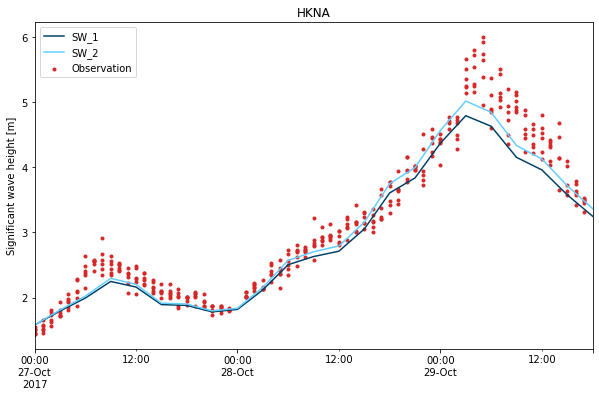

In [16]:
mmc.plot_timeseries(figsize=(10,6))

In [17]:
mmc.plot_timeseries(backend='plotly', width=800);